# Assinment 9 - Reference solution

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import random

Custom LDA function. The following function has been written using **Algorithm 12(Linear discriminant analysis) of chapter 8** of lecture notes. Please refer to the notes to understand the steps. Variable names are also same as notes.
The steps have been vectorized to give optimal performance.

In [5]:
def LDA(X, y, X_predict):
    
    """fit"""
    N = y.shape[0]
    classes = np.unique(y)
    #1)
    N_g = []
    for g in classes:
        N_g.append(y[y == g].shape[0])
    #2)
    p_g = np.array(N_g)/N
    #3)
    mu_g = []
    for g in classes:
        mu_g.append(np.mean(X[y == g], axis=0))
    #4)
    sigma_num = 0
    for index, g in enumerate(classes):
        x_minus_mu_g = X[y==g] - mu_g[index]
        sigma_num += np.dot(x_minus_mu_g.T, x_minus_mu_g)
    sigma_g = sigma_num / (N - classes.shape[0])
    

    """predict"""
    log_p_g = np.log(p_g)
    sigma_g_inv = np.linalg.inv(sigma_g)
    
    #5)
    y_predicted = []
    for x_point in X_predict:  
        g_predicted_score = []
        for index, g in enumerate(classes):
            pred = log_p_g[index] +  np.dot(np.dot(x_point, sigma_g_inv), mu_g[index]) - (0.5*np.dot(np.dot(mu_g[index],sigma_g_inv), mu_g[index]))
            g_predicted_score.append(pred)
        max_index = np.argmax(g_predicted_score)
        y_predicted.append(classes[max_index])
    #6)
    return np.array(y_predicted)


## a) 

In [2]:
N = 30

np.random.seed(123)
X1 = np.random.multivariate_normal([1,1],[[1,0],[0,1]],N)
X1 = np.concatenate((X1,1.0*np.ones((N,1))),axis=1)
X2 = np.random.multivariate_normal([-1,-1],[[1,0],[0,1]],N)
X2 = np.concatenate((X2,2.0*np.ones((N,1))),axis=1)
X3 = np.random.multivariate_normal([2,0],[[1,0],[0,1]],N)
X3 = np.concatenate((X3,3.0*np.ones((N,1))),axis=1)

X = np.concatenate((X1,X2,X3));

In [4]:
X_train = X[:,[0,1]]
y =  X[:,2]

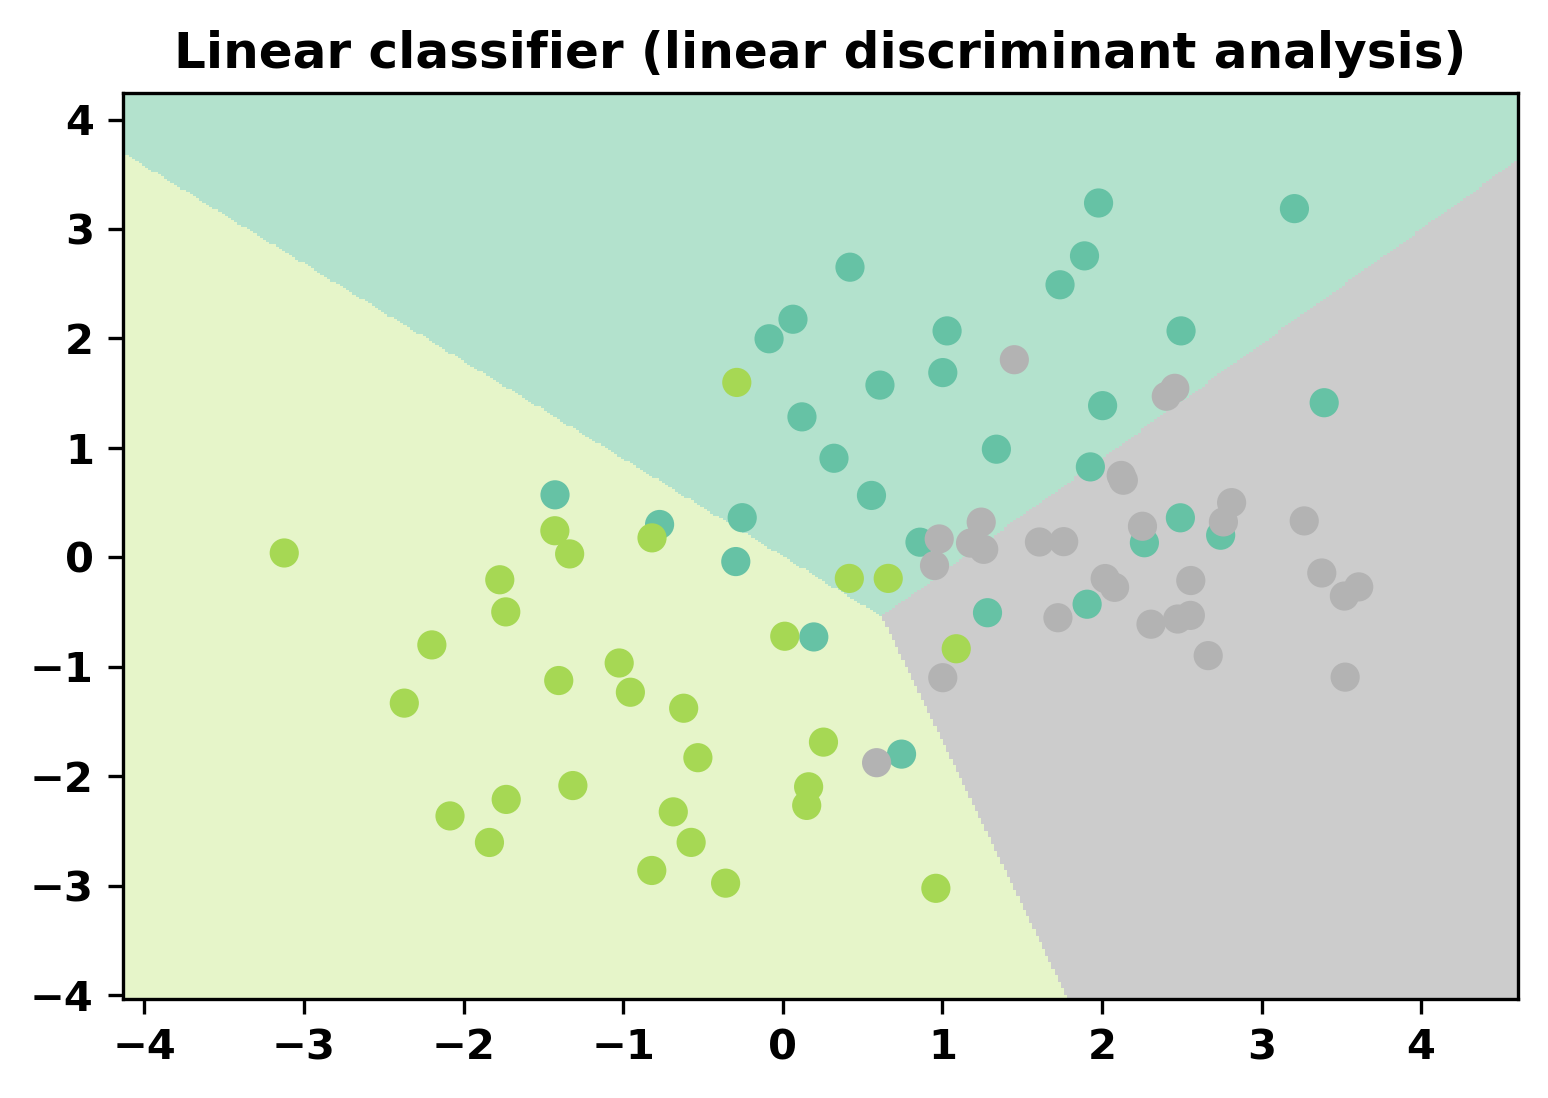

In [6]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = LDA(X_train, y, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(dpi=300)
plt.pcolormesh(xx, yy, Z, cmap='Pastel2', shading='auto')

plt.scatter(X[:,0],X[:,1],c=X[:,2],cmap='Set2');
plt.title("Linear classifier (linear discriminant analysis)")
plt.show()

## b) Performance on Spambase dataset

In [7]:
spambase_df = pd.read_csv('Assignment 3/spambase.data', sep=',', header=None)
spambase_df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [8]:
#Shuffle data and create training and validation sets
random.seed(42)
spambase = spambase_df.values
np.random.shuffle(spambase)

X_train = spambase[:1000,:57]
y_train = spambase[:1000,57]

X_valid = spambase[1000:1100,:57]
y_valid = spambase[1000:1100,57]

In [9]:
def classification_loss(predicted, actual):
    assert len(predicted) == len(actual)
    sum_loss = 0
    for i in range(len(predicted)):
        #print(predicted[i], actual[i])
        if predicted[i] != actual[i]:
            sum_loss += 1
    return sum_loss/len(predicted)

## Comoparison of KNN and LDA Classification:

In [10]:
k = 3
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train, y_train)
knn_predicted = neigh.predict(X_valid)

knn_loss = classification_loss(knn_predicted, y_valid)
print("knn loss = ", knn_loss)

knn loss =  0.24


In [11]:
LDA_predicted = LDA(X_train, y_train, X_valid)
LDA_loss = classification_loss(LDA_predicted, y_valid)
print("LDA loss = ", LDA_loss)

LDA loss =  0.15
